## Train Test Split

In [51]:
xdf = df_number_new.drop(['SalePrice'],axis=1)
ydf =df_number_new['SalePrice']

In [52]:
from sklearn.model_selection import train_test_split
x_traindf,x_testdf,y_traindf,y_testdf=train_test_split(xdf,ydf,test_size=0.30,random_state=40)

## OLS Model

In [53]:
import statsmodels.api as sm
model2 =sm.OLS(y_traindf,x_traindf).fit()

In [54]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.694e+04
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:18:18   Log-Likelihood:                          904.39
No. Observations:                1022   AIC:                                     -1445.
Df Residuals:                     840   BIC:                                     -547.6
Df Model:                         182                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
MSSubClass              -0.0254      0.021     -1.188      0.235      -0.067       0.017
LotFrontage              0.0044      0.020      0.217      0.828      -0.035       0.044
LotArea                  0.0970      0.015      6.422      0.000       0.067       0.127
OverallQual              0.2613      0.037      7.129      0.000       0.189       0.333
OverallCond              0.2325      0.031      7.495      0.000       0.172       0.293
YearBuilt                4.2345      0.829      5.107      0.000       2.607       5.862
YearRemodAdd             1.9287      0.594      3.249      0.001       0.764       3.094
MasVnrArea               0.0010      0.006      0.155      0.877      -0.012       0.014
BsmtFinSF1               0.0164      0.007      2.444      0.015       0.003       0.029
BsmtFinSF2               0.0036      0.012      0.296      0.767      -0.020       0.027
BsmtUnfSF               -0.0005      0.003     -0.140      0.889      -0.007       0.006
TotalBsmtSF              0.0157      0.007      2.197      0.028       0.002       0.030
1stFlrSF                 0.0559      0.058      0.967      0.334      -0.058       0.169
2ndFlrSF                -0.0025      0.007     -0.338      0.735      -0.017       0.012
LowQualFinSF            -0.0086      0.007     -1.160      0.247      -0.023       0.006
GrLivArea                0.4249      0.069      6.160      0.000       0.290       0.560
BsmtFullBath             0.0335      0.017      1.984      0.048       0.000       0.067
BsmtHalfBath            -0.0011      0.026     -0.044      0.965      -0.051       0.049
FullBath                -0.0089      0.033     -0.272      0.785      -0.073       0.055
HalfBath                 0.0118      0.018      0.645      0.519      -0.024       0.048
BedroomAbvGr            -0.0321      0.028     -1.146      0.252      -0.087       0.023
KitchenAbvGr            -0.1073      0.074     -1.460      0.145      -0.252       0.037
TotRmsAbvGrd             0.0325      0.040      0.808      0.419      -0.046       0.111
Fireplaces               0.0223      0.014      1.633      0.103      -0.004       0.049
GarageYrBlt              0.3476      0.612      0.568      0.570      -0.853       1.549
GarageCars               0.1228      0.032      3.792      0.000       0.059       0.186
GarageArea              -0.0098      0.007     -1.423      0.155      -0.023       0.004
WoodDeckSF               0.0034      0.002      2.087      0.037       0.000       0.007
OpenPorchSF              0.0026      0.002      1.161      0.246      -0.002       0.007
EnclosedPorch            0.0034      0.003      1.280      0.201      -0.002       0.009
3SsnPorch                0.0023      0.005     

## Linear Regression Model

In [256]:
from sklearn.linear_model import LinearRegression

In [257]:
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=0, normalize=False)

In [258]:
LR =lr.fit(x_traindf,y_traindf)

In [259]:
LR_Pred = lr.predict(x_testdf)

In [260]:
from sklearn import metrics
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_testdf,LR_Pred))
LR_RMSE

0.15970886404093895

In [261]:
from sklearn.metrics import r2_score
LR_r2_score = r2_score(y_testdf,LR_Pred)
LR_r2_score

0.8211985961936773

In [262]:
from sklearn import metrics
LR_MSE = (metrics.mean_squared_error(y_testdf,LR_Pred))
LR_MSE

0.025506921253247127

In [339]:
from sklearn import metrics
LR_MAE=(metrics.mean_absolute_error(y_testdf, LR_Pred))
LR_MAE

0.09071310314007883

## Random Forest Model

In [263]:
from sklearn.ensemble import RandomForestRegressor

In [264]:
regressor = RandomForestRegressor(n_estimators=100000,random_state=3)

In [194]:
reg=regressor.fit(x_traindf,y_traindf)

In [198]:
rf_y_pred=regressor.predict(x_testdf)

In [266]:
from sklearn import metrics
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_testdf,rf_y_pred))
rf_RMSE

0.12978608680648088

In [265]:
from sklearn.metrics import r2_score
rf_r2_score = r2_score(y_testdf,rf_y_pred)
rf_r2_score

0.8819219535923247

In [340]:
from sklearn import metrics
rf_MAE=(metrics.mean_absolute_error(y_testdf, rf_y_pred))
rf_MAE

0.0864125666727316

In [267]:
from sklearn import metrics
rf_MSE = (metrics.mean_squared_error(y_testdf,rf_y_pred))
rf_MSE

0.016844428328539388

## XGBoost Model

In [585]:
from xgboost import XGBRegressor

In [271]:
xg_reg =XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 6, 
                          alpha = 7, n_estimators = 10000)

In [272]:
xg_reg.fit(x_traindf,y_traindf)

[20:46:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=7, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [273]:
preds = xg_reg.predict(x_testdf)

In [274]:
from sklearn import metrics
XGb_RMSE = np.sqrt(metrics.mean_squared_error(y_testdf,preds))
XGb_RMSE

0.12997333346964643

In [275]:
from sklearn.metrics import r2_score
XGb_r2_score = r2_score(y_testdf,preds)
XGb_r2_score

0.8815809976402929

In [276]:
from sklearn import metrics
XGb_MSE = (metrics.mean_squared_error(y_testdf,preds))
XGb_MSE

0.016893067413211914

In [341]:
from sklearn import metrics
XGb_MAE=(metrics.mean_absolute_error(y_testdf, preds))
XGb_MAE

0.08791613111399554

## KNN Model

In [277]:
from sklearn.neighbors import KNeighborsRegressor

In [278]:
clf = KNeighborsRegressor(n_neighbors = 1,  weights = 'distance', p=1)

In [279]:
reg.fit(x_traindf, y_traindf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

In [280]:
KNN_pred = reg.predict(x_testdf)

In [281]:
from sklearn import metrics
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_testdf,KNN_pred))
KNN_RMSE

0.12978608680648088

In [282]:
from sklearn.metrics import r2_score
KNN_r2_score = r2_score(y_testdf,KNN_pred)
KNN_r2_score

0.8819219535923247

In [283]:
from sklearn import metrics
KNN_MSE = (metrics.mean_squared_error(y_testdf,KNN_pred))
KNN_MSE

0.016844428328539388

In [342]:
from sklearn import metrics
KNN_MAE=(metrics.mean_absolute_error(y_testdf, KNN_pred))
KNN_MAE

0.0864125666727316

## SVR Model

In [239]:
from sklearn.svm import SVR

In [240]:
regressor = SVR(C=1.0, cache_size=100, coef0=0.0, degree=10, epsilon=0.0, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

In [241]:
regressor.fit(x_traindf, y_traindf)

SVR(C=1.0, cache_size=100, coef0=0.0, degree=10, epsilon=0.0, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

In [243]:
y_pred = regressor.predict(x_testdf)

In [284]:
from sklearn import metrics
SVR_RMSE = np.sqrt(metrics.mean_squared_error(y_testdf,y_pred))
SVR_RMSE

0.1208827820033027

In [285]:
from sklearn.metrics import r2_score
SVR_r2_score = r2_score(y_testdf,y_pred)
SVR_r2_score

0.8975665558270297

In [286]:
from sklearn import metrics
SVR_MSE = (metrics.mean_squared_error(y_testdf,y_pred))
SVR_MSE

0.014612646984858002

In [343]:
from sklearn import metrics
SVR_MAE=(metrics.mean_absolute_error(y_testdf, y_pred))
SVR_MAE

0.08041083726244788

## AdaBoost Model

In [290]:
from sklearn.ensemble import AdaBoostRegressor

In [331]:
Ada_reg =AdaBoostRegressor(learning_rate = 0.10,base_estimator =None ,loss = 'linear',n_estimators = 10000)

In [332]:
Ada_reg.fit(x_traindf,y_traindf)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
                  n_estimators=10000, random_state=None)

In [333]:
Ada_pred = Ada_reg.predict(x_testdf)

In [334]:
from sklearn import metrics
Ada_RMSE = np.sqrt(metrics.mean_squared_error(y_testdf,Ada_pred))
Ada_RMSE

0.16594367923133757

In [337]:
from sklearn.metrics import r2_score
Ada_r2_score = r2_score(y_testdf,Ada_pred)
Ada_r2_score

0.8069657766856766

In [335]:
from sklearn import metrics
Ada_MSE = (metrics.mean_squared_error(y_testdf,Ada_pred))
Ada_MSE

0.02753730467683306

In [344]:
from sklearn import metrics
Ada_MAE=(metrics.mean_absolute_error(y_testdf, Ada_pred))
Ada_MAE

0.1237526925113332

## Decision Tree Model

In [455]:
from sklearn.tree import DecisionTreeRegressor

In [556]:
Dtree_reg = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=75,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [557]:
Dtree_reg.fit(x_traindf,y_traindf)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=75,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [558]:
Dtree_pred = Dtree_reg.predict(x_testdf)

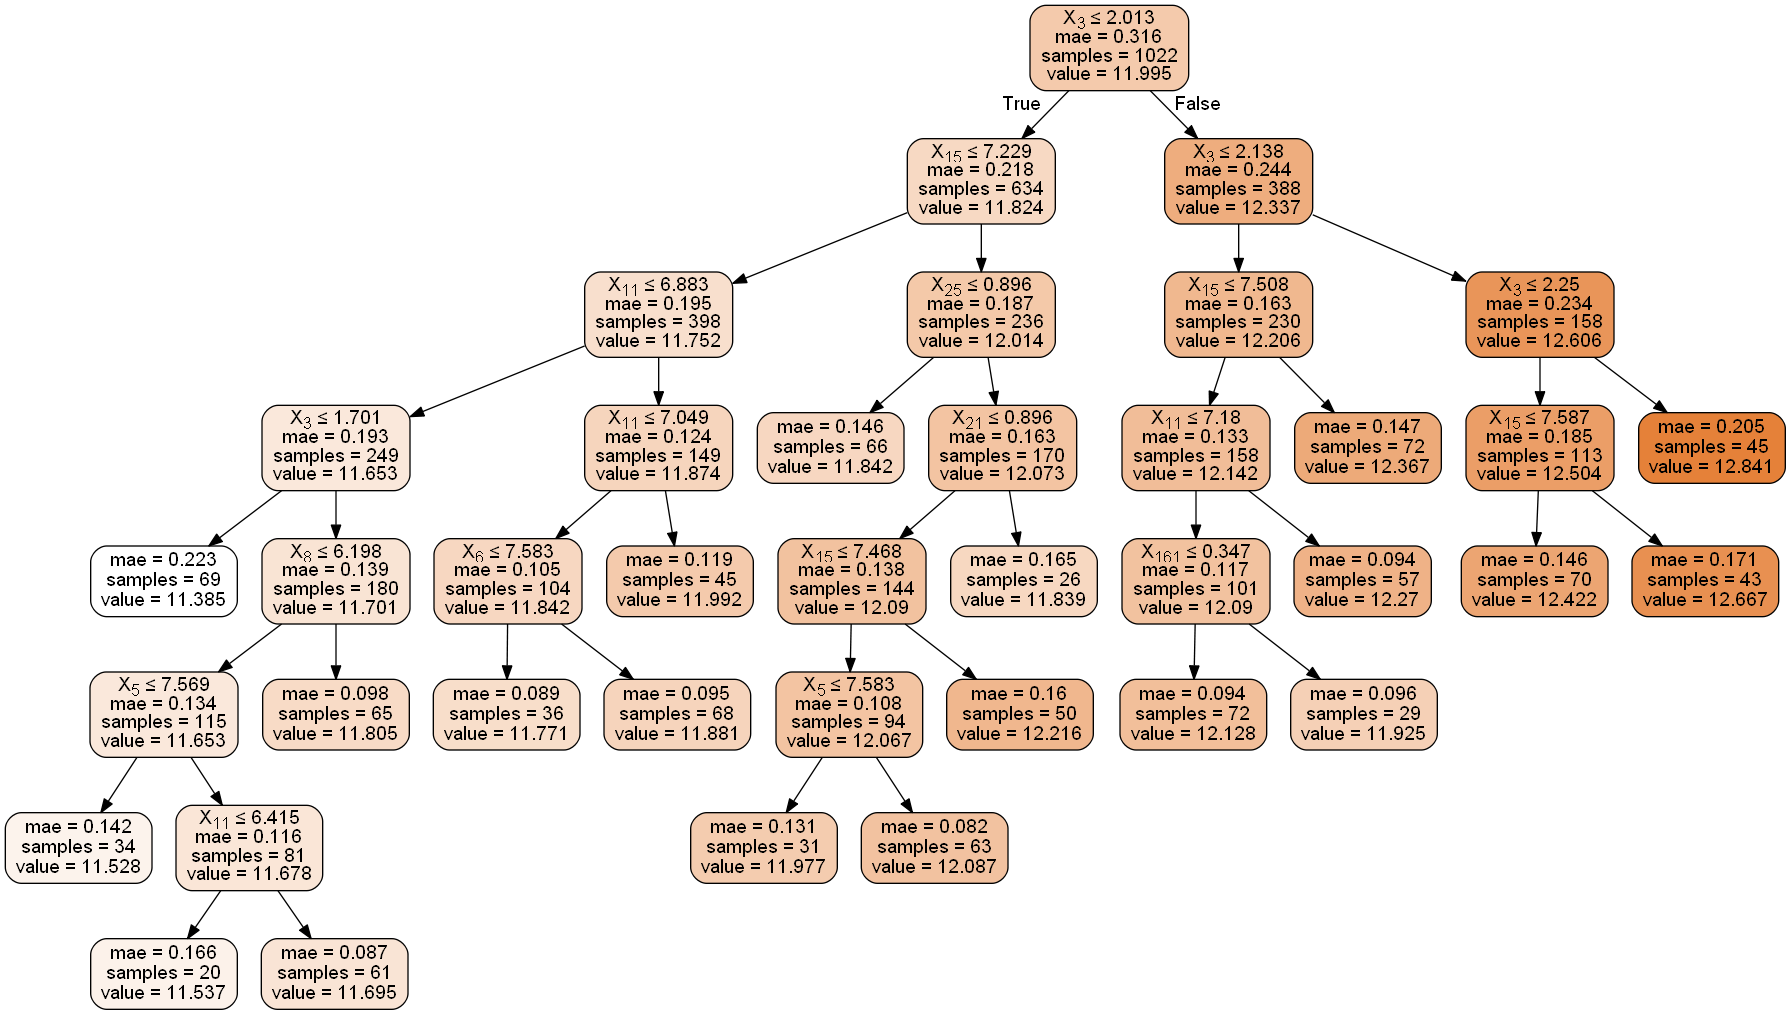

In [559]:
import sklearn.tree as tree
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO()
export_graphviz(Dtree_reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [551]:
from sklearn import metrics
Dtree_RMSE = np.sqrt(metrics.mean_squared_error(y_testdf,Dtree_pred))
Dtree_RMSE

0.16788962249852077

In [552]:
from sklearn.metrics import r2_score
Dtree_r2_score = r2_score(y_testdf,Dtree_pred)
Dtree_r2_score

0.8024119896627496

In [553]:
from sklearn import metrics
Dtree_MSE = (metrics.mean_squared_error(y_testdf,Dtree_pred))
Dtree_MSE

0.028186925342695814

In [554]:
from sklearn import metrics
Dtree_MAE=(metrics.mean_absolute_error(y_testdf, Dtree_pred))
Dtree_MAE

0.12314058763016418

## Overall Best Model

In [555]:
Best_Model ={'Model':['LinearRegression','RandomForestRegressor', 'XGBoost Regressor','Support Vector Regressor', 'KNN Regressor','AdaBoost Regressor','DecisionTreeRegressor'],
        'R2_Score':[LR_r2_score,rf_r2_score,XGb_r2_score,SVR_r2_score,KNN_r2_score,Ada_r2_score,Dtree_r2_score],'RMSE':[LR_RMSE,rf_RMSE,XGb_RMSE,SVR_RMSE,KNN_RMSE,Ada_RMSE,Dtree_RMSE]
            ,'MSE':[LR_MSE,rf_MSE,XGb_MSE,SVR_MSE,KNN_MSE,Ada_MSE,Dtree_MSE],'MAE':[LR_MAE,rf_MAE,XGb_MAE,SVR_MAE,KNN_MAE,Ada_MAE,Dtree_MAE]}
Best_Model =pd.DataFrame(Best_Model)
Best_Model=Best_Model.set_index('Model')
Best_Model

# def highlight_cells(x):
#     df = x.copy()
#     df.loc[:,:] = '' 
#     df.iloc[3,0] = 'background-color: pink'
#     df.iloc[3,1] = 'background-color: orange'
#     df.iloc[3,2] = 'background-color: yellow'
#     df.iloc[3,3] = 'background-color: lightgreen'
#     return df 

# t = Best_Model.style.apply(highlight_cells, axis=None)
# t

,R2_Score,RMSE,MSE,MAE
Model,,,,
LinearRegression,0.821199,0.159709,0.025507,0.090713
RandomForestRegressor,0.881922,0.129786,0.016844,0.086413
XGBoost Regressor,0.881581,0.129973,0.016893,0.087916
Support Vector Regressor,0.897567,0.120883,0.014613,0.080411
KNN Regressor,0.881922,0.129786,0.016844,0.086413
AdaBoost Regressor,0.806966,0.165944,0.027537,0.123753
DecisionTreeRegressor,0.802412,0.167890,0.028187,0.123141


 ####  <html><font color='red' size="4"> The Best Model Is  <font size="4"><font color="blue"> :: </font> </font>Support Vector Regressor</font></html>

## Model Cross Validations

## SVR Grid Search Cross Validation

In [57]:
from sklearn.model_selection import GridSearchCV

In [66]:
C_range = 15.0 ** np.arange(-5, 5)
gamma_range = 15.0 ** np.arange(-5, 5)
param_grid = dict(gamma=gamma_range.tolist(), C=C_range.tolist())

In [67]:
svr = SVR()

In [68]:
grid = GridSearchCV(svr, param_grid)
grid.fit(x_traindf, y_traindf)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.3168724279835392e-06, 1.9753086419753087e-05,
                               0.0002962962962962963, 0.0044444444444444444,
                               0.06666666666666667, 1.0, 15.0, 225.0, 3375.0,
                               50625.0],
                         'gamma': [1.3168724279835392e-06,
                                   1.9753086419753087e-05,
                                   0.0002962962962962963, 0.0044444444444444444,
                                   0.06666666666666667, 1.0, 15.0, 225.0,
                                   3375.0, 50625.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [134]:
clf1=SVR(C=15.0, cache_size=500,coef0=0.0, degree=7, 
  gamma=.001, max_iter=-1,shrinking=True,
  tol=0.0001, verbose=1) #Gives slightly less than the benchmark store
clf1.fit(x_traindf, y_traindf)

[LibSVM]

SVR(C=15.0, cache_size=500, coef0=0.0, degree=7, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.0001, verbose=1)

In [135]:
clf_pred1=clf1.predict(x_testdf)

In [561]:
from sklearn import metrics
SVR_CV = np.sqrt(metrics.mean_squared_error(y_testdf,clf_pred1))
SVR_CV

0.12374809634919628

In [562]:
from sklearn import metrics
SVR_CV_MSE = (metrics.mean_squared_error(y_testdf,clf_pred1))
SVR_CV_MSE

0.015313591350049966

In [563]:
from sklearn import metrics
SVR_CV_MAE=(metrics.mean_absolute_error(y_testdf, clf_pred1))
SVR_CV_MAE

0.0856886316818253

In [606]:
from sklearn.metrics import r2_score
SVR_CV_r2_score = r2_score(y_testdf, clf_pred1)
SVR_CV_r2_score

0.8926529939258457

## Random Forest Grid Search Cross Validation

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100, 120, 140],
    'max_features': [10, 20],
    'min_samples_leaf': [9, 11, 13],
    'min_samples_split': [12, 14, 16],
    'n_estimators': [200, 400, 600, 1000]
}

In [158]:
rf = RandomForestRegressor(random_state=0)

In [160]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 20, n_jobs = -5, verbose = 5)

In [161]:
Grid = grid_search.fit(x_traindf, y_traindf)

Fitting 20 folds for each of 288 candidates, totalling 5760 fits


[Parallel(n_jobs=-5)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-5)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-5)]: Done  64 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-5)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-5)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-5)]: Done 442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-5)]: Done 640 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-5)]: Done 874 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-5)]: Done 1144 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-5)]: Done 1450 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-5)]: Done 1792 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-5)]: Done 2170 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-5)]: Done 2584 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-5)]: Done 3034 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-5)]: Done 3520 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-5)]: Done 4042 tasks      | ela

In [162]:
Reg_preddf=grid_search.predict(x_testdf)

In [566]:
from sklearn import metrics
RF_CV = np.sqrt(metrics.mean_squared_error(y_testdf,Reg_preddf))
RF_CV

0.14135653765893957

In [568]:
from sklearn import metrics
RF_CV_MSE = (metrics.mean_squared_error(y_testdf,Reg_preddf))
RF_CV_MSE

0.019981670738923204

In [567]:
from sklearn import metrics
RF_CV_MAE=(metrics.mean_absolute_error(y_testdf, Reg_preddf))
RF_CV_MAE

0.09186661797835616

In [569]:
from sklearn.metrics import r2_score
RF_CV_r2_score = r2_score(y_testdf, Reg_preddf)
RF_CV_r2_score

0.8599301443305172

## XGboost Grid Search Cross Validation

In [662]:
from sklearn.model_selection import GridSearchCV

In [663]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100, 120, 140],
    'max_features': [10, 20],
    'min_samples_leaf': [9, 11, 13],
    'min_samples_split': [12, 14, 16],
    'n_estimators': [200, 400, 600, 2000]
}

In [664]:
xg_reg =XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 6, 
                          alpha = 7, n_estimators = 10000)

In [610]:
grid_search = GridSearchCV(estimator = xg_reg, param_grid = param_grid, 
                          cv = 10, n_jobs = -4, verbose = 4)

In [611]:
Grid = grid_search.fit(x_traindf,y_traindf)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-4)]: Done  15 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-4)]: Done  88 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-4)]: Done 211 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-4)]: Done 382 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-4)]: Done 603 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-4)]: Done 872 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-4)]: Done 1191 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-4)]: Done 1558 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-4)]: Done 1975 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-4)]: Done 2440 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-4)]: Done 2880 out of 2880 | elapsed: 26.8min finished


[00:03:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [613]:
XGb_preddf=grid_search.predict(x_testdf)

In [614]:
from sklearn import metrics
XGb_RMSE_CV = np.sqrt(metrics.mean_squared_error(y_testdf,XGb_preddf))
XGb_RMSE_CV

0.14095416399309313

In [615]:
from sklearn.metrics import r2_score
XGb_r2_score_CV = r2_score(y_testdf,XGb_preddf)
XGb_r2_score_CV

0.8607264316025169

In [616]:
from sklearn import metrics
XGb_MSE_CV = (metrics.mean_squared_error(y_testdf,XGb_preddf))
XGb_MSE_CV

0.01986807634699179

In [617]:
from sklearn import metrics
XGb_MAE_CV = (metrics.mean_absolute_error(y_testdf, XGb_preddf))
XGb_MAE_CV

0.09703406825629353

## Adaoost Grid Search Cross Validation

In [665]:
from sklearn.model_selection import GridSearchCV

In [680]:
param_grid = {
    'n_estimators': [200, 400, 600, 2000],
    'learning_rate':[0.01,0.05,0.1,0.3,1],
    'loss': ['linear', 'square', 'exponential']
}

In [681]:
Ada_reg =AdaBoostRegressor(learning_rate = 0.10,base_estimator =None ,loss = 'linear',n_estimators = 10000)

In [682]:
grid_search = GridSearchCV(estimator = Ada_reg, param_grid = param_grid, 
                          cv = 10, n_jobs = -4, verbose = 4)

In [683]:
Grid = grid_search.fit(x_traindf,y_traindf)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-4)]: Done  15 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-4)]: Done  88 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-4)]: Done 211 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-4)]: Done 382 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-4)]: Done 600 out of 600 | elapsed: 18.6min finished


In [684]:
Ada_preddf=grid_search.predict(x_testdf)

In [685]:
from sklearn import metrics
Ada_RMSE_CV = np.sqrt(metrics.mean_squared_error(y_testdf,Ada_preddf))
Ada_RMSE_CV

0.16033725366621773

In [686]:
from sklearn.metrics import r2_score
Ada_r2_score_CV = r2_score(y_testdf,Ada_preddf)
Ada_r2_score_CV

0.8197888061068356

In [687]:
from sklearn import metrics
Ada_MSE_CV = (metrics.mean_squared_error(y_testdf,Ada_preddf))
Ada_MSE_CV

0.02570803491322505

In [688]:
from sklearn import metrics
Ada_MAE_CV = (metrics.mean_absolute_error(y_testdf, Ada_preddf))
Ada_MAE_CV

0.11954797593887419

## Final Out

In [690]:
Best_Model ={'Model':['Linear_Regression','RandomForest_Regressor', 'XGBoost_Regressor','SupportVector_Regressor', 'KNN_Regressor','AdaBoost_Regressor','DecisionTree_Regressor','SupportVectorReg_CrossValidated','RandomForest_CrossValidated','XGboost_CrossValidated','AdaBoost_CrossValidated'],
        'R2_Score':[LR_r2_score,rf_r2_score,XGb_r2_score,SVR_r2_score,KNN_r2_score,Ada_r2_score,Dtree_r2_score,SVR_CV_r2_score,RF_CV_r2_score,XGb_r2_score_CV,Ada_r2_score_CV],'RMSE':[LR_RMSE,rf_RMSE,XGb_RMSE,SVR_RMSE,KNN_RMSE,Ada_RMSE,Dtree_RMSE,SVR_CV,RF_CV,XGb_RMSE_CV,Ada_RMSE_CV]
            ,'MSE':[LR_MSE,rf_MSE,XGb_MSE,SVR_MSE,KNN_MSE,Ada_MSE,Dtree_MSE,SVR_CV_MSE,RF_CV_MSE,XGb_MSE_CV,Ada_MSE_CV],'MAE':[LR_MAE,rf_MAE,XGb_MAE,SVR_MAE,KNN_MAE,Ada_MAE,Dtree_MAE,SVR_CV_MAE,RF_CV_MAE,XGb_MAE_CV,Ada_MAE_CV]}
Best_Model =pd.DataFrame(Best_Model)
Best_Model=Best_Model.set_index('Model')
Best_Model

# def highlight_cells(x):
#     df = x.copy()
#     df.loc[:,:] = '' 
#     df.iloc[3,0] = 'background-color: pink'
#     df.iloc[3,1] = 'background-color: orange'
#     df.iloc[3,2] = 'background-color: yellow'
#     df.iloc[3,3] = 'background-color: lightgreen'
#     df.iloc[7,0] = 'background-color: pink'
#     df.iloc[7,1] = 'background-color: orange'
#     df.iloc[7,2] = 'background-color: yellow'
#     df.iloc[7,3] = 'background-color: lightgreen'
#     return df 

# t = Best_Model.style.apply(highlight_cells, axis=None)
# t

,R2_Score,RMSE,MSE,MAE
Model,,,,
Linear_Regression,0.821199,0.159709,0.025507,0.090713
RandomForest_Regressor,0.881922,0.129786,0.016844,0.086413
XGBoost_Regressor,0.881581,0.129973,0.016893,0.087916
SupportVector_Regressor,0.897567,0.120883,0.014613,0.080411
KNN_Regressor,0.881922,0.129786,0.016844,0.086413
AdaBoost_Regressor,0.806966,0.165944,0.027537,0.123753
DecisionTree_Regressor,0.802412,0.167890,0.028187,0.123141
SupportVectorReg_CrossValidated,0.892653,0.123748,0.015314,0.085689
RandomForest_CrossValidated,0.859930,0.141357,0.019982,0.091867


#### <html><font color='red' size="4"> The Best Model Is  <font size="4"><font color="blue"> :: </font> </font>Support Vector Regressor</font></html>